<a href="https://colab.research.google.com/github/ToniYenC11/EmergingTech/blob/main/Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 2

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


None

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


(768, 10)

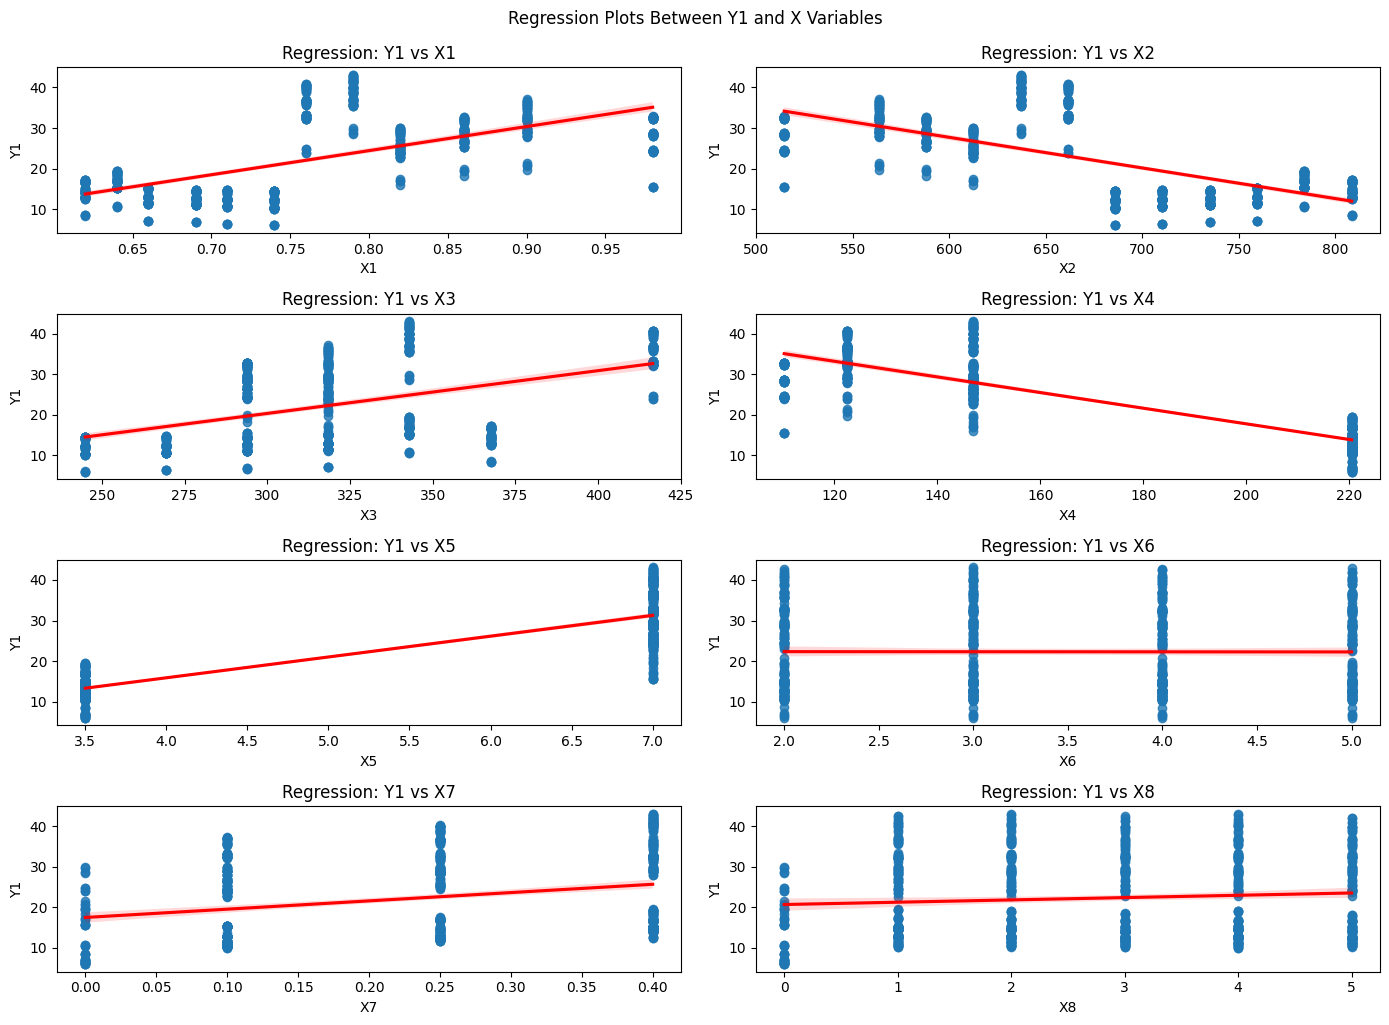

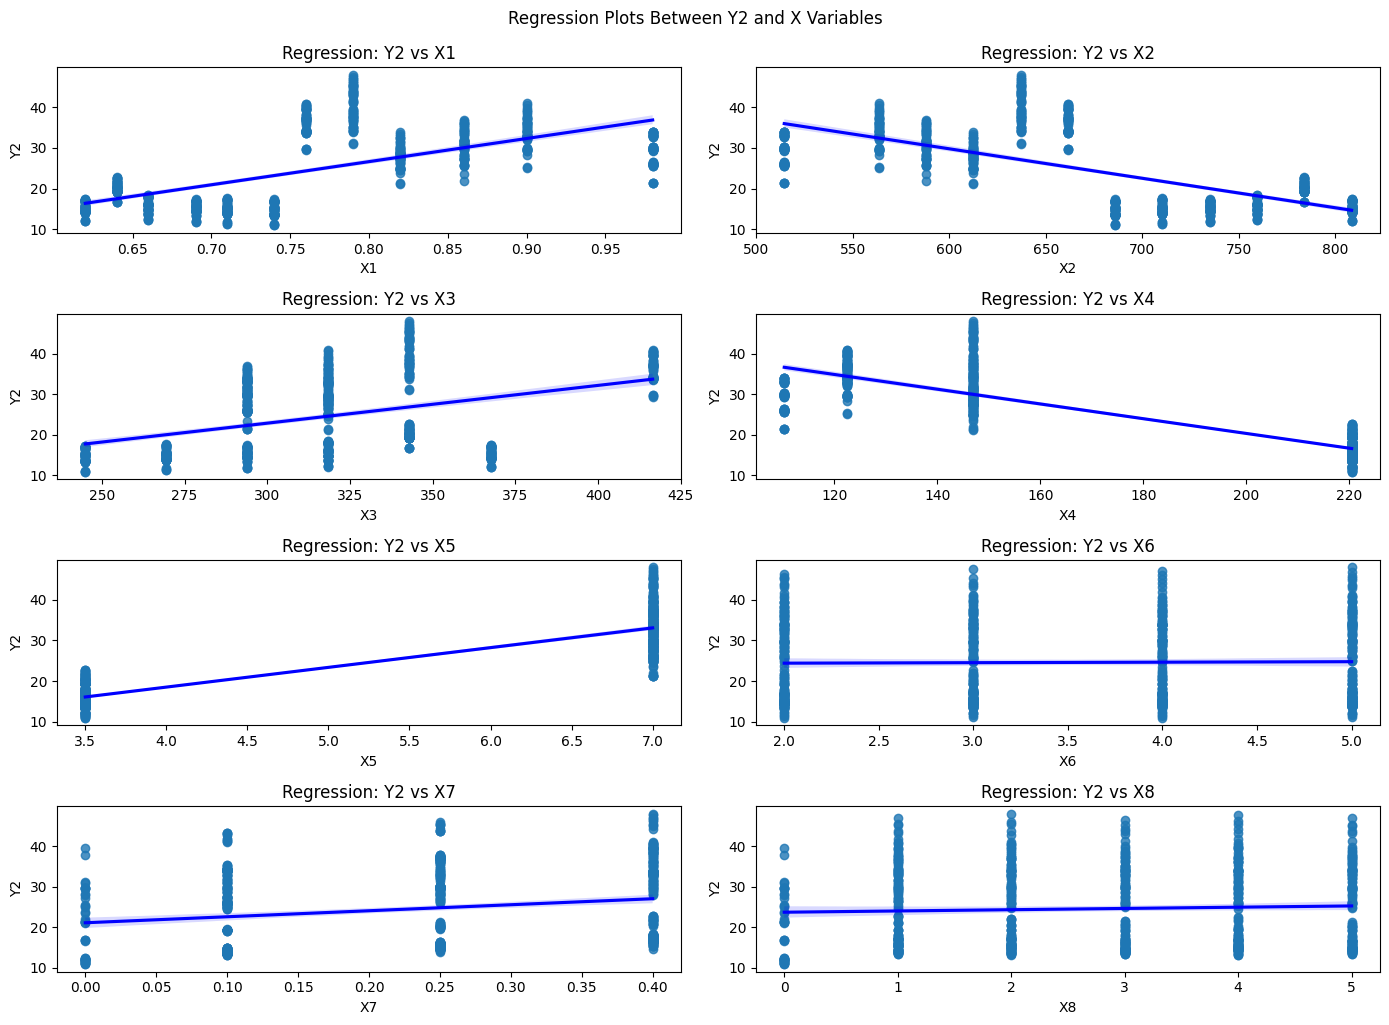

In [ ]:
# Import data and perform basic EDA
df = pd.read_excel('ENB2012_data.xlsx')

display(df.head())
display(df.info())
display(df.corr(numeric_only=True))
display(df.shape)

# Regression plots between Y1, Y2 and each of the X variables
plt.figure(figsize=(14, 10))

# Loop through X1 to X8 and plot regression lines
for i, x_var in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], 1):
    plt.subplot(4, 2, i)
    sns.regplot(x=x_var, y='Y1', data=df, line_kws={'color': 'red'})
    plt.title(f'Regression: Y1 vs {x_var}')

plt.tight_layout()
plt.suptitle("Regression Plots Between Y1 and X Variables", y=1.02)
plt.show()

# Repeat for Y2 vs X1 to X8
plt.figure(figsize=(14, 10))
for i, x_var in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], 1):
    plt.subplot(4, 2, i)
    sns.regplot(x=x_var, y='Y2', data=df, line_kws={'color': 'blue'})
    plt.title(f'Regression: Y2 vs {x_var}')

plt.tight_layout()
plt.suptitle("Regression Plots Between Y2 and X Variables", y=1.02)
plt.show()

## Initial Observations

- From the correlation matrix, it seems that `X6` and `X8` show the weakest correlation with both `Y1` and `Y2`. As such, it is expected that these two variables will be influencing the model the least as well.

- From the visualizations, some variables reflect the correlational matrix, while most have not displayed any correlation. `X2` for instance is highly proportional with `X1` inversely. Majority of the data is distributed consistently with selected values only.

### 1. Split the samples into 60% training, 20% validation, and 20% testing data at random

- For the randomization, we use the `shuffle=True` argument for the training.

In [ ]:
X = df.drop(['Y1','Y2'],axis=1)
y= df[['Y1','Y2']]

# Split data to 60,20,20
X_train, X_dummy, y_train, y_dummy = train_test_split(
    X, y, test_size=0.40, random_state=42,shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(
    X_dummy, y_dummy, test_size=0.50, random_state=42)

### 2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)

In [ ]:
#CREATE A TRAINING LOOP FOR VARIOUS ALPHAS
alphas = np.linspace(0.1, 1.0, 10)

# Initialize a list to store results
def training_loop(X_train,y_train,X_val,y_val):
  results = []
  coefficients_data = []
  for alpha in alphas:
      model_ridge = Ridge(alpha=alpha)
      model_ridge.fit(X_train, y_train)
      y_ridge_pred = model_ridge.predict(X_val)
      y_train_pred = model_ridge.predict(X_train)

      # Extract coefficients and intercepts
      ridge_coefficients = model_ridge.coef_
      ridge_intercept = model_ridge.intercept_

      # Get accuracy score on training set
      R2_ridge_train = model_ridge.score(X_train, y_train)
      MSE_ridge_train = mean_squared_error(y_train, y_train_pred)
      NMSE_ridge_train = MSE_ridge_train/np.var(y_train)
      R2_val = model_ridge.score(X_val, y_val)
      MSE_val = mean_squared_error(y_val, y_ridge_pred)
      NMSE_val = MSE_val/np.var(y_val)

      # Store results in the list
      results.append({
          'Alpha': round(alpha, 2),
          'R2_Train': R2_ridge_train,
          'MSE_Train': MSE_ridge_train,
          'NMSE_Y1_Train': NMSE_ridge_train[0],
          'NMSE_Y2_Train': NMSE_ridge_train[1],
          'R2_Val': R2_val,
          'MSE_Val': MSE_val,
          'NMSE_Y1_Val': NMSE_val[0],
          'NMSE_Y2_Val': NMSE_val[1],
      })
      # Store coefficients for Y1 and Y2
      # Store coefficients for Y1 and Y2
      coefficients_data.append({
          'Alpha': round(alpha, 2),
          'Y': 'Y1',
          'Coefficients': ridge_coefficients[0],
          'Intercept': ridge_intercept[0],
      })
      coefficients_data.append({
          'Alpha': round(alpha, 2),
          'Y': 'Y2',
          'Coefficients': ridge_coefficients[1],
          'Intercept': ridge_intercept[1],
      })
  # Convert results list to a DataFrame
  results_df = pd.DataFrame(results)
  # Convert coefficients data to a DataFrame
  coefficients_df = pd.DataFrame(coefficients_data)
  # Expand the coefficients into separate columns
  coefficients_expanded = pd.DataFrame(coefficients_df['Coefficients'].tolist(), columns=[f'X{i+1}' for i in range(ridge_coefficients.shape[1])])
  coefficients_expanded['Alpha'] = coefficients_df['Alpha']
  coefficients_expanded['Y'] = coefficients_df['Y']
  coefficients_expanded['Intercept'] = coefficients_df['Intercept']
  # Reorder columns
  coefficients_expanded = coefficients_expanded[['Alpha', 'Y','Intercept'] + [f'X{i+1}' for i in range(ridge_coefficients.shape[1])]]
  grouped_coefficients = coefficients_expanded.groupby('Y')

  return results_df,grouped_coefficients

# Use the training loop function
results_df,grouped_coefficients = training_loop(X_train,y_train,X_val,y_val)

# List the used alphas
print(f'List of Alphas = {[round(alpha, 2) for alpha in alphas]}')
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results:")
display(results_df)

# Display the coefficients DataFrame
print("\nCoefficients for Y1 and Y2 grouped by 'Y':")
for name, group in grouped_coefficients:
    print(f"\nGroup: {name}")
    display(group.drop('Y',axis=1))

List of Alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Consolidated Ridge Regression Results:


,Alpha,R2_Train,MSE_Train,NMSE_Y1_Train,NMSE_Y2_Train,R2_Val,MSE_Val,NMSE_Y1_Val,NMSE_Y2_Val
0,0.1,0.898529,9.604429,0.095319,0.106267,0.897619,9.742207,0.099138,0.104652
1,0.2,0.897581,9.694062,0.096209,0.107259,0.896982,9.802833,0.099755,0.105303
2,0.3,0.897097,9.739959,0.096664,0.107767,0.896680,9.831428,0.100046,0.105610
3,0.4,0.896782,9.769810,0.096960,0.108097,0.896503,9.848098,0.100216,0.105789
4,0.5,0.896544,9.792510,0.097186,0.108348,0.896381,9.859574,0.100333,0.105913
5,0.6,0.896343,9.811699,0.097376,0.108560,0.896285,9.868642,0.100425,0.106010
6,0.7,0.896161,9.829111,0.097549,0.108753,0.896200,9.876632,0.100506,0.106096
7,0.8,0.895989,9.845656,0.097713,0.108936,0.896119,9.884240,0.100584,0.106178
8,0.9,0.895820,9.861845,0.097874,0.109115,0.896038,9.891849,0.100661,0.106259
9,1.0,0.895653,9.877975,0.098034,0.109294,0.895955,9.899678,0.100741,0.106344



Coefficients for Y1 and Y2 grouped by 'Y':

Group: Y1


,Alpha,Intercept,X1,X2,X3,X4,X5,X6,X7,X8
0,0.1,2.685819,-19.811189,-0.006735,0.035394,-0.021064,4.995538,-0.013824,20.178119,0.247527
2,0.2,-11.553845,-11.945049,0.003113,0.035159,-0.016023,5.154246,-0.013444,19.983261,0.251374
4,0.3,-17.557754,-8.589407,0.007269,0.035101,-0.013916,5.218350,-0.013597,19.763752,0.255204
6,0.4,-20.832837,-6.728679,0.009539,0.035101,-0.012781,5.251099,-0.013919,19.539872,0.258966
8,0.5,-22.871585,-5.545567,0.010953,0.035128,-0.012088,5.269635,-0.014312,19.316972,0.262649
10,0.6,-24.246193,-4.726724,0.011907,0.035169,-0.011631,5.280530,-0.014738,19.096986,0.266251
12,0.7,-25.223149,-4.126204,0.012586,0.035218,-0.011316,5.286846,-0.015180,18.880719,0.269772
14,0.8,-25.943333,-3.666847,0.013086,0.035273,-0.011093,5.290202,-0.015629,18.668518,0.273214
16,0.9,-26.488217,-3.304025,0.013465,0.035332,-0.010934,5.291534,-0.016080,18.460515,0.276578
18,1.0,-26.908188,-3.010131,0.013757,0.035394,-0.010818,5.291423,-0.016531,18.256737,0.279867



Group: Y2


,Alpha,Intercept,X1,X2,X3,X4,X5,X6,X7,X8
1,0.1,10.271421,-23.131794,-0.006041,0.021817,-0.013929,5.222945,0.095396,14.387960,0.114445
3,0.2,-6.436494,-13.917778,0.005500,0.021540,-0.008020,5.409312,0.096046,14.272830,0.117139
5,0.3,-13.496202,-9.987569,0.010374,0.021468,-0.005547,5.484864,0.096067,14.126086,0.119857
7,0.4,-17.358813,-7.808560,0.013037,0.021465,-0.004214,5.523691,0.095884,13.971584,0.122538
9,0.5,-19.772719,-6.423329,0.014699,0.021492,-0.003397,5.545875,0.095614,13.815685,0.125169
11,0.6,-21.408234,-5.464802,0.015822,0.021537,-0.002857,5.559115,0.095300,13.660743,0.127745
13,0.7,-22.577546,-4.762016,0.016622,0.021591,-0.002484,5.566998,0.094962,13.507787,0.130264
15,0.8,-23.445701,-4.224579,0.017214,0.021652,-0.002219,5.571419,0.094612,13.357305,0.132728
17,0.9,-24.108150,-3.800213,0.017664,0.021717,-0.002027,5.573476,0.094255,13.209529,0.135137
19,1.0,-24.623932,-3.456578,0.018011,0.021785,-0.001887,5.573847,0.093895,13.064564,0.137493


The alphas show below that `alpha = 0.1` shows the best performance based on `R2` of both training and validation dataset. Keep in mind that values below this ($\text{alpha} \approx 0$) will result in a regular linear regression based on ordinary least squares.

### 3. Make one final evaluation on the test data

In [ ]:
# Initialize a list to store results
def testing_loop(X_train,y_train,X_test,y_test):
  results = []
  for alpha in alphas:
      model_ridge = Ridge(alpha=alpha)
      model_ridge.fit(X_train, y_train)
      y_ridge_pred = model_ridge.predict(X_test)

      # Get accuracy score on validation set
      R2_test = model_ridge.score(X_test, y_test)
      MSE_test = mean_squared_error(y_test, y_ridge_pred)
      NMSE_test = MSE_test/np.var(y_test)

      # Store results in the list
      results.append({
          'Alpha': round(alpha, 2),
          'R2_Test': R2_test,
          'MSE_Test': MSE_test,
          'NMSE_Y1_Test': NMSE_test[0],
          'NMSE_Y2_Test': NMSE_test[1],
      })

  # Convert results list to a DataFrame
  results_df_test = pd.DataFrame(results)
  return results_df_test

results_df_test = testing_loop(X_train,y_train,X_test,y_test)
# List the used alphas
print(f'List of Alphas = {[round(alpha, 2) for alpha in alphas]}')
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results (Testing):")
display(results_df_test)

List of Alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Consolidated Ridge Regression Results (Testing):


,Alpha,R2_Test,MSE_Test,NMSE_Y1_Test,NMSE_Y2_Test
0,0.1,0.903281,9.402110,0.088050,0.107826
1,0.2,0.901902,9.533665,0.089282,0.109335
2,0.3,0.901255,9.595133,0.089857,0.110040
3,0.4,0.900871,9.631572,0.090199,0.110458
4,0.5,0.900606,9.656763,0.090435,0.110747
5,0.6,0.900400,9.676252,0.090617,0.110970
6,0.7,0.900228,9.692669,0.090771,0.111158
7,0.8,0.900073,9.707405,0.090909,0.111327
8,0.9,0.899929,9.721247,0.091038,0.111486
9,1.0,0.899789,9.734666,0.091164,0.111640


The testing set evaluation further supports the selection that `alpha=0.1` results in the best performance based on R2 score.

### 4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?

In [ ]:
#Best model results
print('Training Accuracy')
display(results_df[results_df['Alpha']==0.1].iloc[:,1:5])
print('Validation Accuracy')
display(results_df[results_df['Alpha']==0.1].iloc[:,5:])
print('Testing Accuracy')
display(results_df_test[results_df_test['Alpha']==0.1].iloc[:,1:5])

# Coefficients
print('\nCoefficients')
for name, group in grouped_coefficients:
    print(f"\nGroup: {name}")
    display(group[group['Alpha']==0.1].drop(['Y','Alpha'],axis=1))

Training Accuracy


,R2_Train,MSE_Train,NMSE_Y1_Train,NMSE_Y2_Train
0,0.898529,9.604429,0.095319,0.106267


Validation Accuracy


,R2_Val,MSE_Val,NMSE_Y1_Val,NMSE_Y2_Val
0,0.897619,9.742207,0.099138,0.104652


Testing Accuracy


,R2_Test,MSE_Test,NMSE_Y1_Test,NMSE_Y2_Test
0,0.903281,9.40211,0.08805,0.107826



Coefficients

Group: Y1


,Intercept,X1,X2,X3,X4,X5,X6,X7,X8
0,2.685819,-19.811189,-0.006735,0.035394,-0.021064,4.995538,-0.013824,20.178119,0.247527



Group: Y2


,Intercept,X1,X2,X3,X4,X5,X6,X7,X8
1,10.271421,-23.131794,-0.006041,0.021817,-0.013929,5.222945,0.095396,14.38796,0.114445


### 5. What are the top 5 features among X1 to X8?

In [ ]:
# Top 5 features
for idx,(name, group) in enumerate(grouped_coefficients):
    print(f"\nGroup: {name}")
    # First, create a dataframe that stores the coefficients without intercept
    best_model = group[group['Alpha']==0.1].drop(['Y','Alpha','Intercept'],axis=1).transpose()
    # Then, create a new column storing the absolute value of the values then, sort by that column
    best_model[2] = abs(best_model[idx])
    best_model = best_model.sort_values(by=2,ascending=False)
    display(best_model.iloc[0:5,:1])


Group: Y1


,0
X7,20.178119
X1,-19.811189
X5,4.995538
X8,0.247527
X3,0.035394



Group: Y2


,1
X1,-23.131794
X7,14.387960
X5,5.222945
X8,0.114445
X6,0.095396


The top 5 coefficients are `X1`,`X7`,`X5`,`X8`, and `X6` for `Y1`, while `X3` for `Y2`.

From the correlation table earlier, both `X6` and `X8` have the lowest correlation with the data. Ridge regularization allowed us to tune the model in such that both features are significant to the model.

### 6. If you repeat the procedure above using only the 5 top features, what are the results?

In [ ]:
# For this, we will separate the results into two parts: One where X6 is the 5th feature, and another where X3 is the 5th feature

#X3 as the 5th feature
X = df.drop(['Y1','Y2','X2','X4','X6'],axis=1)
y= df[['Y1','Y2']]

# Split data to 60,20,20
X_train, X_dummy, y_train, y_dummy = train_test_split(
    X, y, test_size=0.40, random_state=42,shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(
    X_dummy, y_dummy, test_size=0.50, random_state=42)


# Use the training loop function
results_df,grouped_coefficients = training_loop(X_train,y_train,X_val,y_val)
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results (Train,Validation):")
display(results_df)

# Display the coefficients DataFrame
print("\nCoefficients for Y1 and Y2 grouped by 'Y':")
for name, group in grouped_coefficients:
    print(f"\nGroup: {name}")
    display(group.drop('Y',axis=1))

results_df_test = testing_loop(X_train,y_train,X_test,y_test)
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results (test):")
display(results_df_test)


Consolidated Ridge Regression Results (Train,Validation):


,Alpha,R2_Train,MSE_Train,NMSE_Y1_Train,NMSE_Y2_Train,R2_Val,MSE_Val,NMSE_Y1_Val,NMSE_Y2_Val
0,0.1,0.897643,9.688976,0.096158,0.107203,0.896635,9.836871,0.100102,0.105669
1,0.2,0.897442,9.707783,0.096345,0.107411,0.896681,9.831836,0.100050,0.105615
2,0.3,0.897204,9.730232,0.096568,0.107659,0.896651,9.834166,0.100074,0.105640
3,0.4,0.896953,9.753877,0.096802,0.107921,0.896582,9.840250,0.100136,0.105705
4,0.5,0.896700,9.777732,0.097039,0.108185,0.896492,9.848392,0.100219,0.105793
5,0.6,0.896450,9.801423,0.097274,0.108447,0.896390,9.857757,0.100314,0.105893
6,0.7,0.896202,9.824838,0.097507,0.108706,0.896280,9.867922,0.100418,0.106002
7,0.8,0.895959,9.847970,0.097736,0.108962,0.896164,9.878665,0.100527,0.106118
8,0.9,0.895718,9.870859,0.097963,0.109215,0.896044,9.889868,0.100641,0.106238
9,1.0,0.895480,9.893557,0.098189,0.109466,0.895920,9.901466,0.100759,0.106363



Coefficients for Y1 and Y2 grouped by 'Y':

Group: Y1


,Alpha,Intercept,X1,X2,X3,X4,X5
0,0.1,-15.183664,-11.395408,0.039122,5.367021,20.229233,0.247296
2,0.2,-16.388689,-9.878510,0.040865,5.278355,19.995871,0.251130
4,0.3,-17.302402,-8.715174,0.042202,5.210265,19.764909,0.254903
6,0.4,-18.016459,-7.794558,0.043260,5.156300,19.537265,0.258605
8,0.5,-18.587811,-7.047774,0.044117,5.112453,19.313438,0.262235
10,0.6,-19.053705,-6.429754,0.044827,5.076099,19.093695,0.265790
12,0.7,-19.439523,-5.909773,0.045424,5.045451,18.878162,0.269270
14,0.8,-19.763154,-5.466162,0.045933,5.019248,18.666883,0.272676
16,0.9,-20.037569,-5.083205,0.046372,4.996575,18.459848,0.276009
18,1.0,-20.272398,-4.749221,0.046755,4.976752,18.257014,0.279270



Group: Y2


,Alpha,Intercept,X1,X2,X3,X4,X5
1,0.1,-2.917829,-16.700786,0.023835,5.496471,14.413091,0.116582
3,0.2,-4.721521,-14.477183,0.026394,5.366700,14.257418,0.119220
5,0.3,-6.096964,-12.772257,0.028356,5.267114,14.100753,0.121840
7,0.4,-7.178662,-11.423391,0.029908,5.188249,13.944605,0.124428
9,0.5,-8.050197,-10.329517,0.031167,5.124223,13.789859,0.126978
11,0.6,-8.766244,-9.424515,0.032208,5.071189,13.637053,0.129483
13,0.7,-9.364067,-8.663310,0.033085,5.026524,13.486513,0.131943
15,0.8,-9.869940,-8.014113,0.033832,4.988377,13.338437,0.134355
17,0.9,-10.302914,-7.453865,0.034477,4.955408,13.192938,0.136720
19,1.0,-10.677144,-6.965430,0.035039,4.926617,13.050076,0.139037



Consolidated Ridge Regression Results (test):


,Alpha,R2_Test,MSE_Test,NMSE_Y1_Test,NMSE_Y2_Test
0,0.1,0.902141,9.508832,0.089049,0.109050
1,0.2,0.901676,9.554172,0.089474,0.109570
2,0.3,0.901249,9.595350,0.089859,0.110042
3,0.4,0.900863,9.632458,0.090207,0.110468
4,0.5,0.900513,9.666064,0.090522,0.110853
5,0.6,0.900191,9.696798,0.090809,0.111206
6,0.7,0.899894,9.725224,0.091076,0.111532
7,0.8,0.899616,9.751811,0.091325,0.111837
8,0.9,0.899354,9.776938,0.091560,0.112125
9,1.0,0.899103,9.800911,0.091784,0.112400


In [ ]:
#X6 as the 5th feature
X = df.drop(['Y1','Y2','X2','X4','X3'],axis=1)
y= df[['Y1','Y2']]

# Split data to 60,20,20
X_train, X_dummy, y_train, y_dummy = train_test_split(
    X, y, test_size=0.40, random_state=42,shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(
    X_dummy, y_dummy, test_size=0.50, random_state=42)


# Use the training loop function
results_df,grouped_coefficients = training_loop(X_train,y_train,X_val,y_val)
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results (Train,Validation):")
display(results_df)

# Display the coefficients DataFrame
print("\nCoefficients for Y1 and Y2 grouped by 'Y':")
for name, group in grouped_coefficients:
    print(f"\nGroup: {name}")
    display(group.drop('Y',axis=1))

results_df_test = testing_loop(X_train,y_train,X_test,y_test)
# Display the consolidated results DataFrame
print("\nConsolidated Ridge Regression Results (test):")
display(results_df_test)



Consolidated Ridge Regression Results (Train,Validation):


,Alpha,R2_Train,MSE_Train,NMSE_Y1_Train,NMSE_Y2_Train,R2_Val,MSE_Val,NMSE_Y1_Val,NMSE_Y2_Val
0,0.1,0.892266,10.217347,0.101402,0.113049,0.888828,10.595743,0.107824,0.113821
1,0.2,0.891892,10.253196,0.101758,0.113445,0.888706,10.606898,0.107938,0.113941
2,0.3,0.891356,10.304573,0.102268,0.114014,0.888411,10.634645,0.108220,0.114239
3,0.4,0.890707,10.366841,0.102886,0.114703,0.887992,10.674302,0.108623,0.114665
4,0.5,0.889978,10.436658,0.103579,0.115475,0.887485,10.722478,0.109114,0.115182
5,0.6,0.889197,10.511599,0.104322,0.116304,0.886916,10.776690,0.109665,0.115764
6,0.7,0.888381,10.589888,0.105099,0.117171,0.886303,10.835105,0.110260,0.116392
7,0.8,0.887543,10.670220,0.105897,0.118059,0.885660,10.896365,0.110883,0.117050
8,0.9,0.886695,10.751632,0.106704,0.118960,0.884999,10.959456,0.111525,0.117728
9,1.0,0.885842,10.833415,0.107516,0.119865,0.884327,11.023618,0.112178,0.118417



Coefficients for Y1 and Y2 grouped by 'Y':

Group: Y1


,Alpha,Intercept,X1,X2,X3,X4,X5
0,0.1,6.303451,-32.479024,6.705097,0.026129,19.993106,0.252694
2,0.2,5.451312,-30.698372,6.616380,0.025845,19.759384,0.257031
4,0.3,4.691429,-29.101978,6.536801,0.025552,19.530202,0.261233
6,0.4,4.010049,-27.662633,6.465009,0.025252,19.305558,0.265309
8,0.5,3.396002,-26.358235,6.399909,0.024947,19.085422,0.269268
10,0.6,2.840129,-25.170643,6.340601,0.024639,18.869742,0.273115
12,0.7,2.334845,-24.084830,6.286341,0.024329,18.658452,0.276857
14,0.8,1.873819,-23.088239,6.236506,0.024019,18.451471,0.280500
16,0.9,1.451722,-22.170299,6.190571,0.023709,18.248714,0.284047
18,1.0,1.064042,-21.322047,6.148093,0.023401,18.050089,0.287505



Group: Y2


,Alpha,Intercept,X1,X2,X3,X4,X5
1,0.1,9.809940,-29.542000,6.311882,0.120124,14.283473,0.117568
3,0.2,9.024614,-27.920493,6.231095,0.119942,14.118615,0.120752
5,0.3,8.323543,-26.466806,6.158630,0.119749,13.956730,0.123832
7,0.4,7.694190,-25.156156,6.093257,0.119548,13.797860,0.126816
9,0.5,7.126376,-23.968413,6.033978,0.119340,13.642015,0.129710
11,0.6,6.611749,-22.887052,5.979975,0.119127,13.489188,0.132519
13,0.7,6.143395,-21.898387,5.930568,0.118910,13.339351,0.135250
15,0.8,5.715539,-20.990983,5.885191,0.118691,13.192468,0.137905
17,0.9,5.323324,-20.155209,5.843366,0.118471,13.048494,0.140489
19,1.0,4.962631,-19.382902,5.804689,0.118250,12.907376,0.143006



Consolidated Ridge Regression Results (test):


,Alpha,R2_Test,MSE_Test,NMSE_Y1_Test,NMSE_Y2_Test
0,0.1,0.902807,9.451140,0.088509,0.108388
1,0.2,0.902476,9.486973,0.088844,0.108799
2,0.3,0.901986,9.537808,0.089321,0.109382
3,0.4,0.901384,9.599113,0.089895,0.110085
4,0.5,0.900706,9.667628,0.090536,0.110871
5,0.6,0.899975,9.740989,0.091223,0.111713
6,0.7,0.899210,9.817471,0.091940,0.112590
7,0.8,0.898424,9.895810,0.092673,0.113488
8,0.9,0.897626,9.975076,0.093415,0.114397
9,1.0,0.896825,10.054586,0.094160,0.115309


# Guide Questions



### 1. What is the impact of removing certain features on the model’s performance?

#### Answer:
Removing certain features from a model can significantly impact its performance, depending on the relevance of the removed features.

1. **Loss of Important Information**
  - If key features that are strongly related to the target variable are removed, the model's ability to make accurate predictions can decrease, leading to a drop in performance, especially on the test data.

2. **Improved Generalization**
  - If the removed features are irrelevant or noisy, removing them can help improve the model's ability to generalize to unseen data, resulting in a more stable model, and reducing the risk of overfitting.

3. **Simpler Model**
  - Simplifying the model by reducing features can improve interpretability and training speed, especially in high-dimensional datasets where where a simpler model might perform better due to fewer chances for overfitting.

4. Multicollinearity Reduction:
  - When features are highly correlated, removing redundant ones can reduce multicollinearity, which often enhances the stability and interpretability of the model, especially in linear models.

5. **Changes in Coefficients**
  - Removing features can alter the coefficients of the remaining ones, causing the model to place more importance on them. This can impact both the accuracy and interpretability of the results.
6. **Impact on Regularization**
  - For regularized models like Ridge Regression, removing features can reduce model complexity and the regularization penalty, potentially improving performance if the removed features were contributing to overfitting.

### 2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?

#### Answer:
- It is necessary to split the data into training, validation, and testing sets to ensure the model can learn from data, be fine-tuned, and be evaluated in an unbiased manner. The training set is used to teach the model, the validation set helps optimize the model’s parameters and avoid overfitting, and the testing set provides an unbiased evaluation of the model’s performance on unseen data.

- If this step is skipped, the model may overfit to the training data, resulting in poor generalization to new, unseen data. The performance of the model could be falsely inflated, as it would not be tested on data it didn’t encounter during training. Furthermore, without proper validation, hyperparameters may be incorrectly tuned, resulting in a model that performs suboptimally in real-world scenarios.



### 3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?

#### Answer:
- To assess the generalization ability of the model using the test data, evaluate the model’s performance on this unseen data after it has been trained on the training set and validated on the validation set. The performance metrics (e.g., accuracy, R², mean squared error) on the test set reveal how well the model can make predictions on new, real-world data, providing an estimate of its ability to generalize.

- To ensure the model generalizes well to unseen data, several steps can be taken:
first, perform cross-validation to evaluate the model’s performance on different subsets of the training data; second, apply regularization methods (such as Ridge or Lasso regression) to prevent overfitting; third, simplify the model by removing irrelevant or redundant features; and lastly, monitor the performance on both the training and validation sets to identify potential overfitting or underfitting.